In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,0,"[{'id': 86780, 'name': 'Clash of the Titans Co...",150000000,"[{'id': 12, 'name': 'Adventure'}]",http://www.wrathofthetitansmovie.org,tt1646987,en,Wrath of the Titans,A decade after his heroic defeat of the monstr...,7.739904,/Albfq3ziSCQVyh5PzMSsFmmgHmy.jpg,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_...",3/27/12,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Feel the Wrath,Wrath of the Titans,"[{'id': 1449, 'name': 'underworld'}, {'id': 20...","[{'cast_id': 4, 'character': 'Perseus', 'credi...","[{'credit_id': '52fe4926c3a36847f818b96d', 'de...",301000000
1,1,NaN,35000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,tt0120681,en,From Hell,Frederick Abberline is an opium-huffing inspec...,7.790140,/f3J77Cy3pRSeeN52Pk8oIvgi6IN.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",10/19/01,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Only the legend will survive.,From Hell,"[{'id': 1465, 'name': 'loss of family'}, {'id'...","[{'cast_id': 19, 'character': 'Inspector Frede...","[{'credit_id': '52fe4273c3a36847f801fbfb', 'de...",74558115


In [4]:
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,0,NaN,9500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://laurenceanywaysthemovie.com,tt1650048,fr,Laurence Anyways,"Set in the 1980s and 1990s, a man tries to sal...",8.594980,/qxUKbHFaqC0PYKITLERnt5fmuBg.jpg,"[{'name': 'MK2 Productions', 'id': 9209}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",5/18/12,168.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Laurence Anyways,"[{'id': 10180, 'name': 'homosexuality'}, {'id'...","[{'cast_id': 1, 'character': 'Laurence Alia', ...","[{'credit_id': '52fe4accc3a36847f81e22eb', 'de..."
1,1,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt1817081,en,A Case of You,"Young writer Sam has a crush on Birdie, the cu...",5.819403,/88LARDAx2qwlg6wfdNkGH1t31Dn.jpg,"[{'name': 'Lagniappe Films', 'id': 14637}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",11/6/13,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll be everything she likes but himself.,A Case of You,"[{'id': 187056, 'name': 'woman director'}, {'i...","[{'cast_id': 4, 'character': 'Sam Newman', 'cr...","[{'credit_id': '55154011925141538d000cb7', 'de..."


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2400 non-null   int64  
 1   belongs_to_collection  479 non-null    object 
 2   budget                 2400 non-null   int64  
 3   genres                 2393 non-null   object 
 4   homepage               754 non-null    object 
 5   imdb_id                2400 non-null   object 
 6   original_language      2400 non-null   object 
 7   original_title         2400 non-null   object 
 8   overview               2394 non-null   object 
 9   popularity             2400 non-null   float64
 10  poster_path            2399 non-null   object 
 11  production_companies   2275 non-null   object 
 12  production_countries   2356 non-null   object 
 13  release_date           2400 non-null   object 
 14  runtime                2398 non-null   float64
 15  spok

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     600 non-null    int64  
 1   belongs_to_collection  125 non-null    object 
 2   budget                 600 non-null    int64  
 3   genres                 600 non-null    object 
 4   homepage               192 non-null    object 
 5   imdb_id                600 non-null    object 
 6   original_language      600 non-null    object 
 7   original_title         600 non-null    object 
 8   overview               598 non-null    object 
 9   popularity             600 non-null    float64
 10  poster_path            600 non-null    object 
 11  production_companies   569 non-null    object 
 12  production_countries   589 non-null    object 
 13  release_date           600 non-null    object 
 14  runtime                600 non-null    float64
 15  spoken

In [7]:
train['revenue'].describe()

count    2.400000e+03
mean     6.586852e+07
std      1.371701e+08
min      1.000000e+00
25%      2.218824e+06
50%      1.653708e+07
75%      6.837989e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [8]:
train['imdb_id'].nunique(), test['imdb_id'].nunique()

(2400, 600)

In [9]:
train['original_language'].nunique()

35

In [10]:
train['original_language'].unique()

array(['en', 'fr', 'cn', 'ru', 'hi', 'ro', 'de', 'sv', 'tr', 'no', 'es',
       'ja', 'bn', 'ta', 'ko', 'it', 'ml', 'zh', 'hu', 'nl', 'fa', 'fi',
       'te', 'pt', 'da', 'el', 'cs', 'vi', 'pl', 'nb', 'he', 'id', 'mr',
       'ar', 'ur'], dtype=object)

In [11]:
train.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,-0.032039,-0.026772,-0.026906,-0.014646
budget,-0.032039,1.000000,0.367651,0.233737,0.756382
popularity,-0.026772,0.367651,1.000000,0.150293,0.476102
runtime,-0.026906,0.233737,0.150293,1.000000,0.214462
revenue,-0.014646,0.756382,0.476102,0.214462,1.000000


In [12]:
train['release_date'].unique()

array(['3/27/12', '10/19/01', '12/11/67', ..., '3/8/90', '4/16/04',
       '6/27/06'], dtype=object)

In [13]:
train['release_date'].nunique()

2008

In [14]:
print(train['release_date'].unique())

['3/27/12' '10/19/01' '12/11/67' ... '3/8/90' '4/16/04' '6/27/06']


In [15]:
print(train['release_date'].apply(lambda x: len(x.split('/'))).unique())

[3]


In [16]:
train['release_year'] = train['release_date'].apply(lambda x: '19' + x.split('/')[2] if int(x.split('/')[2]) > 20 else '20' + x.split('/')[2])
train['release_month'] = train['release_date'].apply(lambda x: x.split('/')[0])
train['release_day'] = train['release_date'].apply(lambda x: x.split('/')[1])

train['release_date'] = pd.to_datetime(train['release_year'] + '-' + train['release_month'] + '-' + train['release_day'])

In [17]:
train['release_date'][:10]

0   2012-03-27
1   2001-10-19
2   1967-12-11
3   2006-08-04
4   1980-08-08
5   2015-01-29
6   1992-07-10
7   2017-03-23
8   2010-06-17
9   2013-07-30
Name: release_date, dtype: datetime64[ns]

In [18]:
train['release_date_gap'] = (pd.to_datetime('11/21/20') - train['release_date']).dt.days

In [19]:
train['release_date_gap'][:10]

0     3161
1     6973
2    19339
3     5223
4    14715
5     2123
6    10361
7     1339
8     3810
9     2671
Name: release_date_gap, dtype: int64

In [20]:
train['release_date_gap_bins'] = pd.cut(train['release_date_gap'], 10)
train.groupby('release_date_gap_bins')['revenue'].agg(['count', 'mean'])

,count,mean
release_date_gap_bins,,
"(1185.908, 4629.2]",893,8.416128e+07
"(4629.2, 8038.4]",644,7.321612e+07
"(8038.4, 11447.6]",397,5.278801e+07
"(11447.6, 14856.8]",261,3.414126e+07
"(14856.8, 18266.0]",72,5.007660e+07
"(18266.0, 21675.2]",49,2.483064e+07
"(21675.2, 25084.4]",39,2.278783e+07
"(25084.4, 28493.6]",22,6.679822e+06
"(28493.6, 31902.8]",10,4.138800e+06


In [21]:
train.groupby('release_month')['revenue'].agg(['count', 'mean'])

,count,mean
release_month,,
1,170,2.969315e+07
10,249,4.246237e+07
11,167,8.361969e+07
12,213,8.602535e+07
2,165,5.609879e+07
3,198,7.589077e+07
4,195,5.376393e+07
5,180,9.316958e+07
6,184,1.223656e+08


In [22]:
train.groupby('release_year')['revenue'].agg(['count', 'mean'])

,count,mean
release_year,,
1924,1,1.213880e+06
1925,1,4.510000e+04
1927,2,5.139390e+05
1928,3,5.056990e+05
1930,1,7.940000e+03
1931,2,1.619594e+06
1932,3,1.064675e+06
1933,2,2.730000e+06
1935,1,3.202000e+06


In [23]:
train.corr()

,id,budget,popularity,runtime,revenue,release_date_gap
id,1.000000,-0.032039,-0.026772,-0.026906,-0.014646,0.034057
budget,-0.032039,1.000000,0.367651,0.233737,0.756382,-0.215585
popularity,-0.026772,0.367651,1.000000,0.150293,0.476102,-0.104183
runtime,-0.026906,0.233737,0.150293,1.000000,0.214462,0.028455
revenue,-0.014646,0.756382,0.476102,0.214462,1.000000,-0.141643
release_date_gap,0.034057,-0.215585,-0.104183,0.028455,-0.141643,1.000000


In [24]:
train['status'].unique()

array(['Released', 'Rumored'], dtype=object)

In [25]:
test['status'].unique()

array(['Released', 'Rumored'], dtype=object)

In [26]:
train.groupby('status')['revenue'].agg(['count', 'mean'])

,count,mean
status,,
Released,2397,6.594524e+07
Rumored,3,4.563932e+06


In [27]:
test.groupby('status')['id'].agg(['count'])

,count
status,
Released,599
Rumored,1


In [28]:
train['homepage_isnull'] = np.where(pd.isnull(train['homepage']), 1, 0)
train.groupby('homepage_isnull')['revenue'].agg(['count', 'mean'])

,count,mean
homepage_isnull,,
0,754,1.196612e+08
1,1646,4.122716e+07


In [29]:
train['tagline'].isnull().sum(), train['tagline'].nunique()

(482, 1918)

In [30]:
train['tagline_isnull'] = np.where(pd.isnull(train['tagline']), 1, 0)
train.groupby('tagline_isnull')['revenue'].agg(['count', 'mean'])

,count,mean
tagline_isnull,,
0,1918,7.819347e+07
1,482,1.682442e+07


In [31]:
train['poster_path'].nunique(), test['poster_path'].nunique()

(2399, 600)

In [32]:
train.shape

(2400, 30)

In [33]:
train['poster_path'].isnull().sum()

1

In [34]:
train['title'].nunique()

2377

In [35]:
train['title'].value_counts()

Sahara                                                            2
The One and Only                                                  2
Unknown                                                           2
The Other Woman                                                   2
Deadfall                                                          2
Casino Royale                                                     2
Ghost                                                             2
Lolita                                                            2
Scarface                                                          2
Anna Karenina                                                     2
Fantastic Four                                                    2
Priest                                                            2
Black Sheep                                                       2
Logan                                                             2
The Three Musketeers                            

In [36]:
train['title_count'] = train['title'].map(train['title'].value_counts())
train.groupby('title_count')['revenue'].agg(['count', 'mean'])

,count,mean
title_count,,
1,2354,6.530876e+07
2,46,9.451368e+07


In [37]:
print(train['Keywords'][0])

[{'id': 1449, 'name': 'underworld'}, {'id': 2033, 'name': 'hades'}, {'id': 2035, 'name': 'mythology'}, {'id': 2036, 'name': 'greek mythology'}, {'id': 8985, 'name': 'zeus'}, {'id': 161170, 'name': 'perseus'}, {'id': 161172, 'name': 'gods'}, {'id': 162861, 'name': 'ancient greece'}, {'id': 166457, 'name': 'ares'}, {'id': 185343, 'name': 'based on myths or folklore'}, {'id': 209714, 'name': '3d'}]


In [38]:
print(train['cast'][0])

[{'cast_id': 4, 'character': 'Perseus', 'credit_id': '52fe4926c3a36847f818b907', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0, 'profile_path': '/6SGb5R9wmbQNpQIzuNcL5dCCAcq.jpg'}, {'cast_id': 3, 'character': 'Zeus', 'credit_id': '52fe4926c3a36847f818b903', 'gender': 2, 'id': 3896, 'name': 'Liam Neeson', 'order': 1, 'profile_path': '/9mdAohLsDu36WaXV2N3SQ388bvz.jpg'}, {'cast_id': 6, 'character': 'Hades', 'credit_id': '52fe4926c3a36847f818b90f', 'gender': 2, 'id': 5469, 'name': 'Ralph Fiennes', 'order': 2, 'profile_path': '/nt6wcXariJ2kQiMFocMUjvVP92A.jpg'}, {'cast_id': 9, 'character': 'Ares', 'credit_id': '52fe4926c3a36847f818b91b', 'gender': 2, 'id': 25616, 'name': 'Edgar Ram√≠rez', 'order': 3, 'profile_path': '/yQFzQITF35S9VpzO8sHDgxYA3cs.jpg'}, {'cast_id': 10, 'character': 'Argenor', 'credit_id': '52fe4926c3a36847f818b91f', 'gender': 2, 'id': 20286, 'name': 'Toby Kebbell', 'order': 4, 'profile_path': '/wQU3uFk2TWjT2qfs2Z6rkdbWbjx.jpg'}, {'cast_id': 5, 'character': 

In [39]:
print(train['crew'][0])

[{'credit_id': '52fe4926c3a36847f818b96d', 'department': 'Production', 'gender': 1, 'id': 474, 'job': 'Casting', 'name': 'Jina Jay', 'profile_path': '/rMuj07hjZnT0zMC1kiBOs6IWCdO.jpg'}, {'credit_id': '5545e81bc3a3680ce6006539', 'department': 'Editing', 'gender': 2, 'id': 9154, 'job': 'Editor', 'name': 'Martin Walsh', 'profile_path': None}, {'credit_id': '52fe4926c3a36847f818b973', 'department': 'Costume & Make-Up', 'gender': 1, 'id': 11227, 'job': 'Costume Design', 'name': 'Jany Temime', 'profile_path': None}, {'credit_id': '52fe4926c3a36847f818b95b', 'department': 'Sound', 'gender': 2, 'id': 17004, 'job': 'Original Music Composer', 'name': 'Javier Navarrete', 'profile_path': None}, {'credit_id': '52fe4926c3a36847f818b961', 'department': 'Camera', 'gender': 2, 'id': 22161, 'job': 'Director of Photography', 'name': 'Ben Davis', 'profile_path': None}, {'credit_id': '52fe4926c3a36847f818b949', 'department': 'Production', 'gender': 2, 'id': 18865, 'job': 'Executive Producer', 'name': 'Loui

In [40]:
print(train['production_companies'][0])

[{'name': 'Legendary Pictures', 'id': 923}, {'name': 'Thunder Road Pictures', 'id': 3528}, {'name': 'Warner Bros.', 'id': 6194}, {'name': 'Cott Productions', 'id': 24175}, {'name': 'Furia de Titanes II, A.I.E.', 'id': 24176}]


In [41]:
print(train['production_countries'][0])

[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]


In [42]:
print(train['spoken_languages'][0])

[{'iso_639_1': 'en', 'name': 'English'}]


In [43]:
train['overview'].nunique(), test['overview'].nunique()

(2394, 598)

In [44]:
train['overview'].value_counts()

Based on Mariane Pearl's account of the terrifying and unforgettable story of her husband, Wall Street Journal reporter Danny Pearl's life and death.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [46]:
train['overview_isnull'] = train['overview'].isnull().astype(int)
train.groupby('overview_isnull')['revenue'].agg(['count', 'mean'])

,count,mean
overview_isnull,,
0,2394,6.602735e+07
1,6,2.492342e+06


In [47]:
print(train['genres'][0]), print(train['genres'][1])

[{'id': 12, 'name': 'Adventure'}]
[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}, {'id': 53, 'name': 'Thriller'}]


(None, None)

In [50]:
def get_genres(x):
    if pd.isnull(x):
        return np.nan
    else:
        df = pd.DataFrame(eval(x))
        return df['name'].drop_duplicates().values.tolist()

train['genres_name'] = train['genres'].apply(lambda x: get_genres(x))
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_date_gap,release_date_gap_bins,homepage_isnull,tagline_isnull,title_count,overview_isnull,genres_name
0,0,"[{'id': 86780, 'name': 'Clash of the Titans Co...",150000000,"[{'id': 12, 'name': 'Adventure'}]",http://www.wrathofthetitansmovie.org,tt1646987,en,Wrath of the Titans,A decade after his heroic defeat of the monstr...,7.739904,/Albfq3ziSCQVyh5PzMSsFmmgHmy.jpg,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_...",2012-03-27,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Feel the Wrath,Wrath of the Titans,"[{'id': 1449, 'name': 'underworld'}, {'id': 20...","[{'cast_id': 4, 'character': 'Perseus', 'credi...","[{'credit_id': '52fe4926c3a36847f818b96d', 'de...",301000000,2012,3,27,3161,"(1185.908, 4629.2]",0,0,1,0,[Adventure]
1,1,NaN,35000000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,tt0120681,en,From Hell,Frederick Abberline is an opium-huffing inspec...,7.790140,/f3J77Cy3pRSeeN52Pk8oIvgi6IN.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",2001-10-19,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Only the legend will survive.,From Hell,"[{'id': 1465, 'name': 'loss of family'}, {'id'...","[{'cast_id': 19, 'character': 'Inspector Frede...","[{'credit_id': '52fe4273c3a36847f801fbfb', 'de...",74558115,2001,10,19,6973,"(4629.2, 8038.4]",1,0,1,0,"[Horror, Mystery, Thriller]"
2,2,NaN,4000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0061735,en,Guess Who's Coming to Dinner,Matt and Christina Drayton are a couple whose ...,5.032469,/bhdXWhembE6a6q11NqpUcEdtAbw.jpg,"[{'name': 'Stanley Kramer Productions', 'id': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1967-12-11,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A love story of today,Guess Who's Coming to Dinner,"[{'id': 582, 'name': 'san francisco'}, {'id': ...","[{'cast_id': 1, 'character': 'Matt Drayton', '...","[{'credit_id': '52fe431dc3a36847f803b563', 'de...",56666667,1967,12,11,19339,"(18266.0, 21675.2]",1,0,1,0,"[Comedy, Drama, Romance]"
3,3,NaN,72500000,"[{'id': 35, 'name': 'Comedy'}]",http://www.sonypictures.com/homevideo/talladeg...,tt0415306,en,Talladega Nights: The Ballad of Ricky Bobby,Lifelong friends and national idols Ricky Bobb...,6.936688,/hi8whfL7t6cL2LITLJjzJ7UWuZA.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-08-04,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The story of a man who could only count to #1,Talladega Nights: The Ballad of Ricky Bobby,"[{'id': 5922, 'name': 'north carolina'}, {'id'...","[{'cast_id': 8, 'character': 'Ricky Bobby', 'c...","[{'credit_id': '52fe4521c3a36847f80be20f', 'de...",162966177,2006,8,4,5223,"(4629.2, 8038.4]",0,0,1,0,[Comedy]
4,4,NaN,20000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 10402, ...",NaN,tt0081777,en,Xanadu,A beautiful muse inspires an artist and his ol...,3.782547,/wc3dC8DrI6qgD5sQlIkbjU7wcaS.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1980-08-08,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"A Fantasy, A Musical, A Place Where Dreams Com...",Xanadu,"[{'id': 4344, 'name': 'musical'}, {'id': 6234,...","[{'cast_id': 1, 'character': 'Kira', 'credit_i...","[{'credit_id': '53700504c3a368121800ea1b', 'de...",22471595,1980,8,8,14715,"(11447.6, 14856.8]",1,0,1,0,"[Fantasy, Music, Romance]"


In [51]:
train['popularity'].unique()

array([7.739904, 7.79014 , 5.032469, ..., 9.502332, 2.06528 , 0.399156])

In [52]:
train['popularity'].min(), train['popularity'].max()

(1e-06, 294.337037)

In [53]:
train['popularity_bins'] = pd.cut(train['popularity'], 10)
train.groupby('popularity_bins')['revenue'].agg(['count', 'mean'])

,count,mean
popularity_bins,,
"(-0.294, 29.434]",2374,6.104457e+07
"(29.434, 58.867]",17,4.519623e+08
"(58.867, 88.301]",2,5.697288e+07
"(88.301, 117.735]",2,7.700279e+08
"(117.735, 147.169]",2,6.872332e+08
"(147.169, 176.602]",1,3.693304e+08
"(176.602, 206.036]",0,NaN
"(206.036, 235.47]",0,NaN
"(235.47, 264.903]",0,NaN


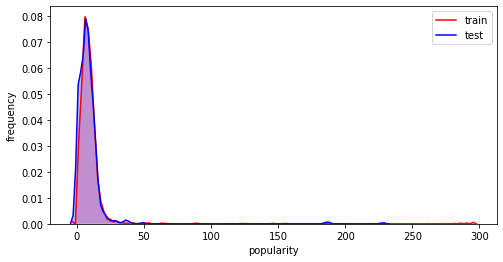

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
ax = sns.kdeplot(train['popularity'], color='r', shade=True)
ax = sns.kdeplot(test['popularity'], color='b', shade=True)
ax.set_xlabel('popularity')
ax.set_ylabel('frequency')
ax = ax.legend(['train', 'test'])

In [ ]:
print(train['belongs_to_collection'][0])
print(train['belongs_to_collection'][9])

In [ ]:
train['belongs_to_collection_length'] = train['belongs_to_collection'].apply(lambda x: 0 if pd.isnull(x) else len(eval(x)))
train['belongs_to_collection_length'].unique()

In [ ]:
train['original_title'].value_counts()[:10]

In [ ]:
train['release_year'] = train['release_date'].apply(lambda x: '19' + x.split('/')[2] if int(x.split('/')[2]) > 20 else '20' + x.split('/')[2])
train['release_month'] = train['release_date'].apply(lambda x: x.split('/')[0])
train['release_day'] = train['release_date'].apply(lambda x: x.split('/')[1])

train['release_date'] = pd.to_datetime(train['release_year'] + '-' + train['release_month'] + '-' + train['release_day'])
train.drop(['release_year', 'release_month', 'release_day'], axis=1, inplace=True)

train['opfrom_TONOW'] = (datetime.now() - train['release_date']).dt.days